# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = url + "q=" + city
    city_url = f"{url}&q={city}" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jilotepec de molina enriquez
Processing Record 3 of Set 1 | yichang
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | vangaindrano
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | khandyga
Processing Record 11 of Set 1 | el granada
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | pechora
Processing Record 14 of Set 1 | smithers
Processing Record 15 of Set 1 | montevideo
Processing Record 16 of Set 1 | prince george
Processing Record 17 of Set 1 | pacasmayo
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | san andres
Processing Record 20 of Set 1 | kingston
Processing Record 21 of Set 1 | wailua homesteads
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()


City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.83,83,100,8.46,PN,1699827225
1,jilotepec de molina enriquez,19.9528,-99.5347,20.65,45,43,2.82,MX,1699827400
2,yichang,30.7144,111.2847,7.69,87,89,0.40,CN,1699827401
3,kruisfontein,-34.0033,24.7314,11.82,85,2,3.76,ZA,1699827401
4,invercargill,-46.4000,168.3500,11.68,95,100,2.68,NZ,1699827401


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("myoutput_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,20.04,77,20,6.17,MG,1699753696
1,olonkinbyen,70.9221,-8.7187,-0.64,81,99,6.63,SJ,1699753697
2,qaqortoq,60.7167,-46.0333,-3.09,68,69,3.82,GL,1699753440
3,mercedes,-34.6515,-59.4307,18.35,82,0,0.66,AR,1699753697
4,flin flon,54.7682,-101.8650,-0.12,85,8,6.00,CA,1699753698


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

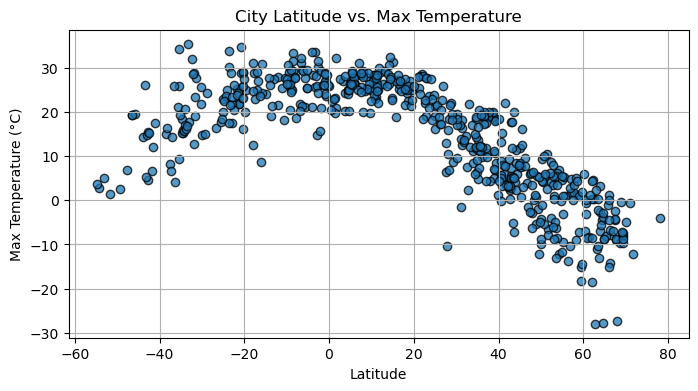

In [ ]:
# Build a scatter plot for Latitude vs. Temperature
plt.figure(figsize=(8, 4)) 

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set grid lines
plt.grid()

# Save the figure
plt.savefig("myoutput_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

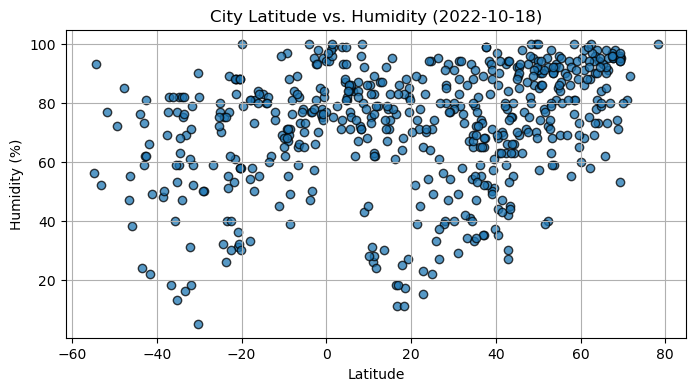

In [ ]:
# Build a scatter plot for Latitude vs. Humidity
plt.figure(figsize=(8, 4)) 

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid()

# Save the figure
plt.savefig("myoutput_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

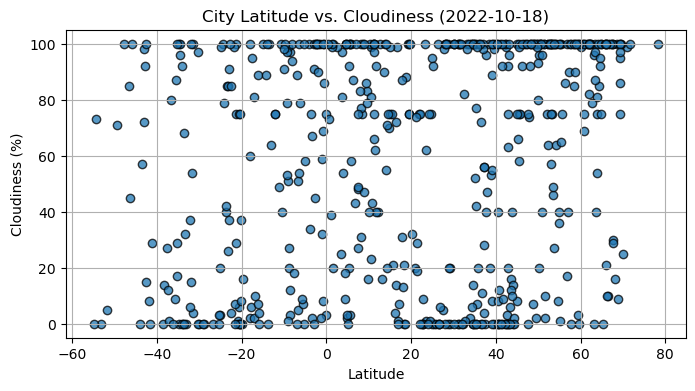

In [ ]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.figure(figsize=(8, 4)) 

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid()

# Save the figure
plt.savefig("myoutput_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

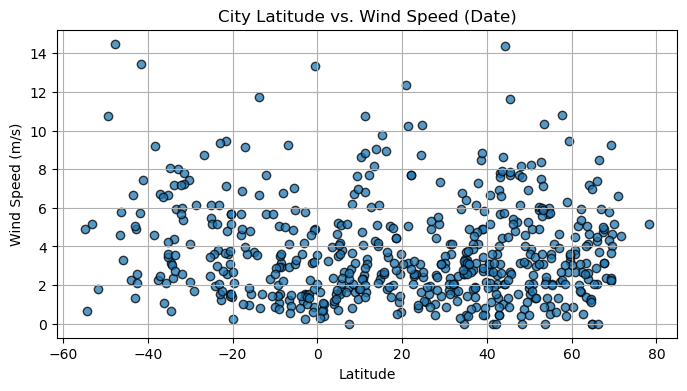

In [ ]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.figure(figsize=(8, 4))  

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Set labels and title
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set grid lines
plt.grid()

# Save the figure
plt.savefig("myoutput_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship

In [ ]:
def plot_linear_regression(x, y, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, regress_values, "r", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")

    # Annotate the plot
    plt.annotate(f"R-squared = {round(r_squared, 2)}",text_coordinates, fontsize=12, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.legend()
    plt.show()



In [ ]:
# Create a DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the Northern Hemisphere DataFrame
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,-0.64,81,99,6.63,SJ,1699753697
2,qaqortoq,60.7167,-46.0333,-3.09,68,69,3.82,GL,1699753440
4,flin flon,54.7682,-101.8650,-0.12,85,8,6.00,CA,1699753698
5,bilibino,68.0546,166.4372,-27.29,98,16,2.38,RU,1699753698
7,stephenville,32.2207,-98.2023,14.53,76,0,2.06,US,1699753698


In [ ]:
# Create DataFrame for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display the first few rows of the Southern Hemisphere DataFrame
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,20.04,77,20,6.17,MG,1699753696
3,mercedes,-34.6515,-59.4307,18.35,82,0,0.66,AR,1699753697
6,puerto natales,-51.7236,-72.4875,1.42,77,5,1.81,CL,1699753698
9,grytviken,-54.2811,-36.5092,2.69,93,73,0.65,GS,1699753426
10,invercargill,-46.4000,168.3500,19.45,55,45,5.81,NZ,1699753686


###  Temperature vs. Latitude Linear Regression Plot

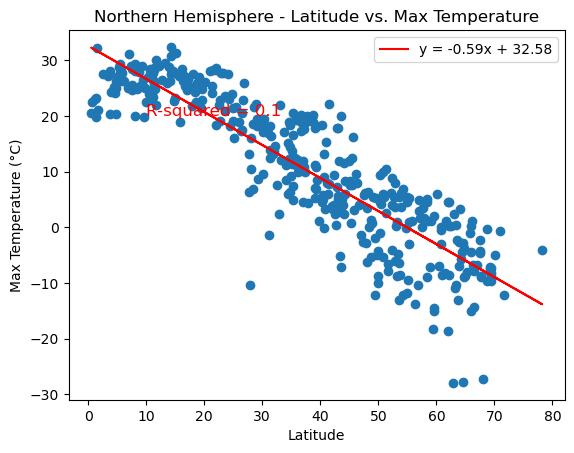

The r-value is: 0.10


In [ ]:
# Linear regression on Northern Hemisphere
# Filter the DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and create the plot
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Northern Hemisphere - Latitude vs. Max Temperature",
    (10, 20) 
)

#print the rsquare value
r_squared = r_value ** 2
print(f"The r-value is: {r_squared:.2f}")

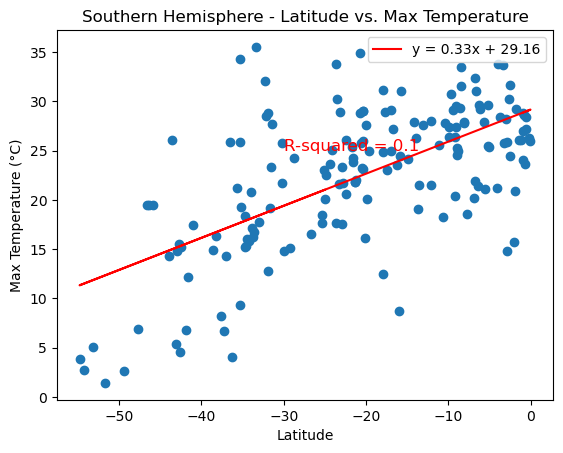

The r-value is: 0.10


In [ ]:
# Linear regression on Southern Hemisphere
# Filter the DataFrame for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and create the plot
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Southern Hemisphere - Latitude vs. Max Temperature",
    (-30, 25)  
)

# print R-value
r_squared = r_value ** 2
print(f"The r-value is: {r_squared:.2f}")


**Discussion about the linear relationship:** 
 The r-value of 0.10 in both hemispheres suggest that there is a weak correlation between latitude and temperature. It further indicates that latitude's impact on temperature is relatively consistent between the Northern and Southern Hemispheres.

These findings can be valuable for climate and weather analyses and predictions in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

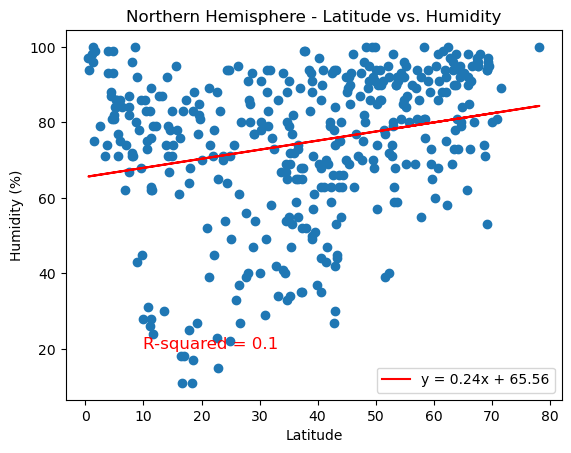

The r-value is: 0.10


In [ ]:
# Northern hemisphere
# Filter the DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and create the plot
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere - Latitude vs. Humidity",
    (10, 20) 
)
# print r square
r_squared = r_value ** 2
print(f"The r-value is: {r_squared:.2f}")


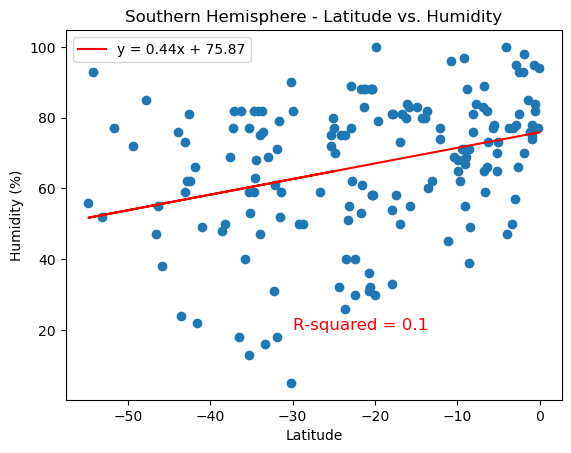

R-value is: 0.10


In [ ]:
# Filter the DataFrame for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and create the plot
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere - Latitude vs. Humidity",
    (-30, 20)  
)

# Calculate and print R-squared value
r_squared = r_value ** 2
print(f"R-value is: {r_squared:.2f}")


**Discussion about the linear relationship:** The r-value of 0.10 in both hemispheres suggest that there is a weak correlation between latitude and humidity. It further indicates that latitude's impact on humidity is relatively consistent between the Northern and Southern Hemispheres.

These findings can be valuable for climate and weather analyses and predictions in each hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

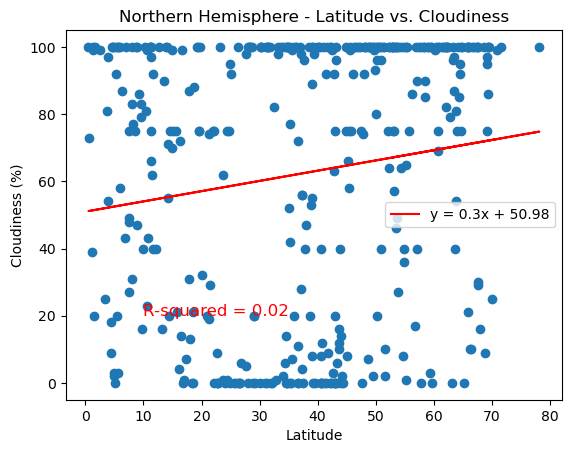

R-value is: 0.02


In [ ]:
#Nothern Hemisphere
# Filter the DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and create the plot
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere - Latitude vs. Cloudiness",
    (10, 20)  
)

# Calculate and print R-squared value
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
r_squared = r_value ** 2
print(f"R-value is: {r_squared:.2f}")



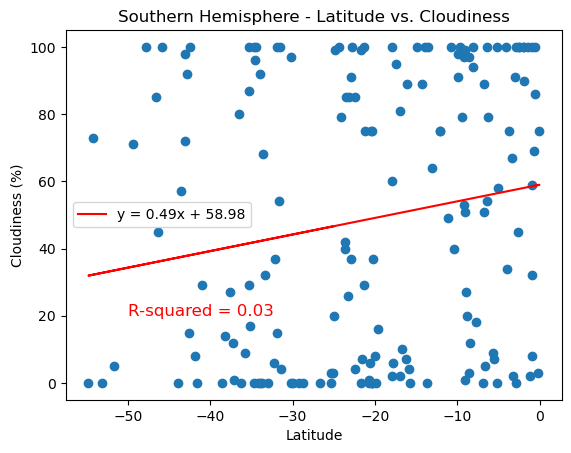

R-value is: 0.03


In [ ]:
# Southern Hemisphere
# Filter the DataFrame for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and create the plot
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere - Latitude vs. Cloudiness",
    (-50, 20)
)

# Calculate and print R-squared value
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
r_squared = r_value ** 2
print(f"R-value is: {r_squared:.2f}")


**Discussion about the linear relationship:** With the above result, it is obvious that r-value is low in both hemispheres. It indicates a very weak correlation between latitude and cloudiness in both hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

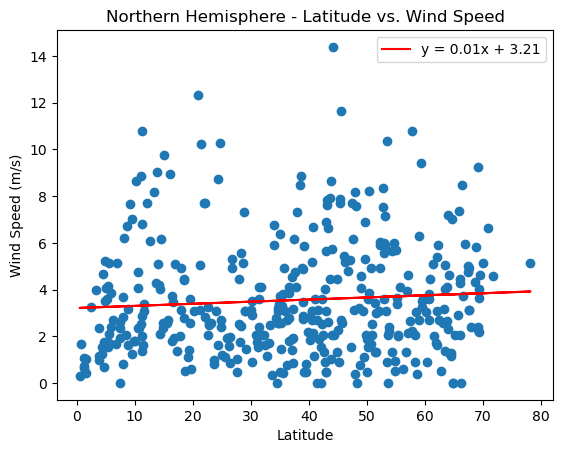

R-value is: 0.01


In [ ]:
# Nothern Hemisphere
# Filter the DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression and create the plot
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere - Latitude vs. Wind Speed",
    (10, 20)  # Text annotation coordinates
)

# Calculate and print R-squared value
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
r_squared = r_value ** 2
print(f"R-value is: {r_squared:.2f}")


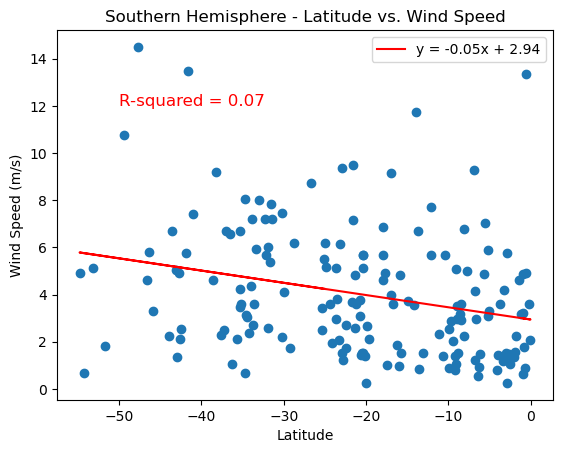

R-value is: 0.07


In [ ]:
#Southern Hemisphere
# Filter the DataFrame for the Southern Hemisphere (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression and create the plot
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere - Latitude vs. Wind Speed",
    (-50, 12)  
)

# Calculate and print R-squared value
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
r_squared = r_value ** 2
print(f"R-value is: {r_squared:.2f}")



Discussion about the linear relationship:

R value of 0.01 indicates a very weak or almost non-existent correlation between latitude and wind speed in the Northern Hemisphere.

In the Southern Hemisphere, r- value of 0.04 indicates a very weak, but slightly stronger, correlation between latitude and wind speed compared to the Northern Hemisphere.

These findings highlight the complexity of wind speed variations and the need to consider multiple factors when analyzing and predicting wind patterns.